In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber = pd.read_csv(r'C:\Users\rraj1\Desktop\Python Files\DataAnalytics_Projects\Uber_DA\Uber_Data/uber-raw-data-janjune-15.csv', encoding='utf-8')
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [3]:
uber['Pickup_date'] = pd.to_datetime(uber['Pickup_date'], format="%Y/%m/%d %H:%M:%S")

In [4]:
uber['weekday']=uber['Pickup_date'].dt.day_name()
uber['day']=uber['Pickup_date'].dt.day
uber['minute']=uber['Pickup_date'].dt.minute
uber['month']=uber['Pickup_date'].dt.month
uber['hour']=uber['Pickup_date'].dt.hour

In [5]:
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,17,47,5,9
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,17,47,5,9
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,17,47,5,9
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,17,47,5,9
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,17,47,5,9


In [6]:
#Uber pickup monthly-wise in New York city
uber['month'].value_counts()

6    2816895
5    2695553
4    2280837
2    2263620
3    2259773
1    1953801
Name: month, dtype: int64

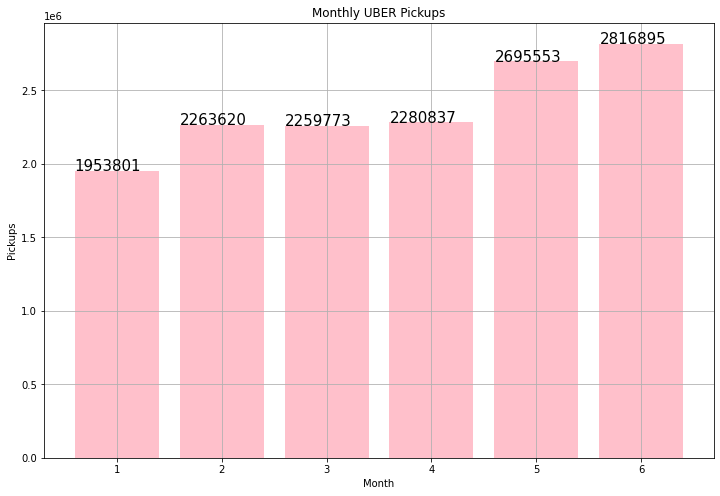

In [7]:
x = uber['month'].value_counts().index
y = uber['month'].value_counts()

plt.figure(figsize=(12,8))
bars = plt.bar(x,y, color='pink', width=0.8)
plt.grid()
plt.title('Monthly UBER Pickups')
plt.xlabel('Month')
plt.ylabel('Pickups')
#plt.plot(x, y, linewidth='2.0', color='black', marker='o', markersize='6')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=15)

#### We can see that the number of Uber pickup has been steadily increasing throughout the first half of 2015 in NYC

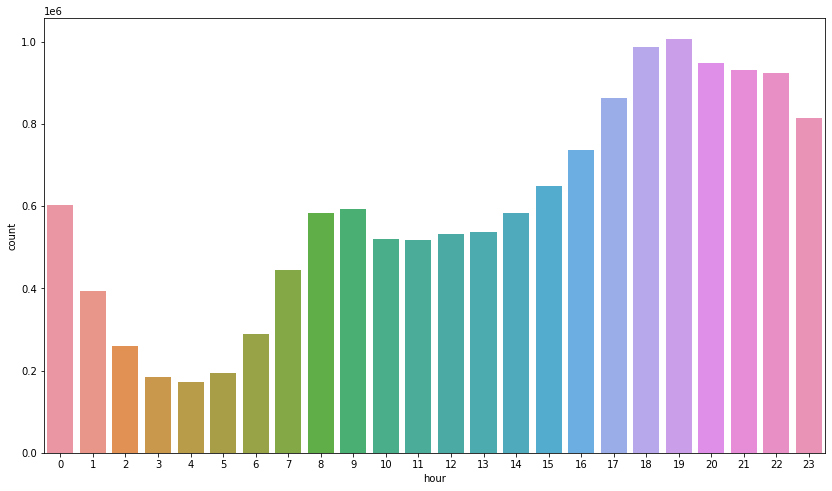

In [8]:
#Analysing Uber pickups intensity each hour during the day
plt.figure(figsize=(14,8))
sns.countplot(uber['hour'])

#### Interestingly, after the morning rush, the number of UBER pickups doesn't dip much throughout the rest of the morning and early afternoon. There is significantly more demand in the evening than the daytime.
#### Let's investigate to see if there's a difference in hourly pattern for different days of the week.

In [9]:
uber_perday = uber.groupby(['weekday','hour'])['Pickup_date'].count().reset_index()
uber_perday

,weekday,hour,Pickup_date
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


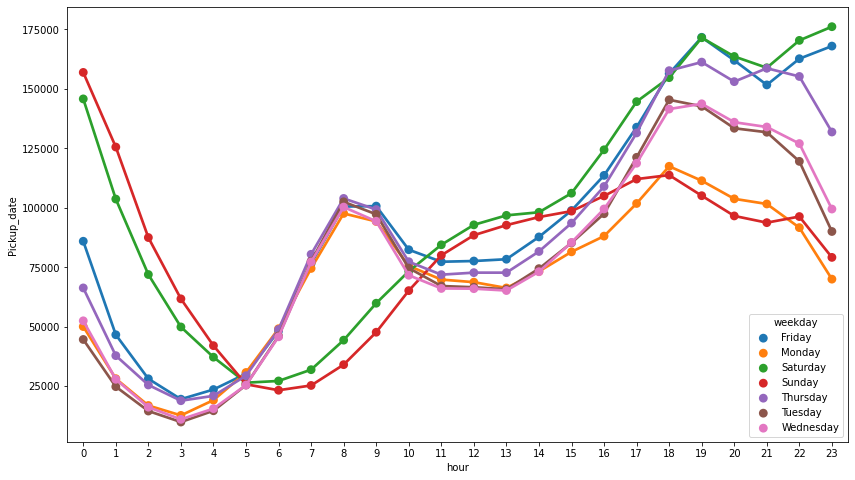

In [10]:
plt.figure(figsize=(14,8))
sns.pointplot(x="hour", y="Pickup_date", hue="weekday", data=uber_perday)

#### Clearly, from the plot one can gather insights that UBER pickups are low during early morning and constantly increases after noon each day.
#### Also, as expected, pickup is low in morning on weekends as compared to on weekdays due to office going hours from 8-10am